## 1. Logistic Regression in Python With scikit-learn: Type 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
#Giving the length of tumer predicting the pobability that its a cancerous
x=np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape((-1,1))
y=np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print("x=",x)
print("y=",y)

x= [[3.78]
 [2.44]
 [2.09]
 [0.14]
 [1.72]
 [1.65]
 [4.92]
 [4.37]
 [4.96]
 [4.52]
 [3.69]
 [5.88]]
y= [0 0 0 0 0 0 1 1 1 1 1 1]


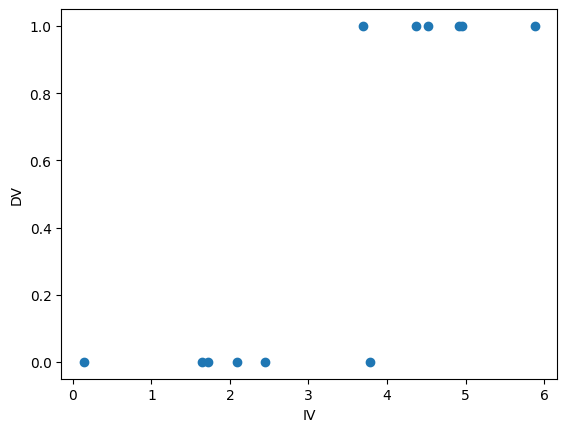

In [ ]:
plt.scatter(x,y)
plt.xlabel("IV")
plt.ylabel("DV")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR1=LogisticRegression()


In [ ]:
LR1.fit(x,y)

LogisticRegression()

In [ ]:
predicted=LR1.predict(np.array([3.44]).reshape((-1,1)))
print(predicted)

[0]


In [ ]:
log_coef=LR1.coef_
odds=np.exp(log_coef)
print(odds)#This tells us that as the size of a tumor increases by 1mm the odds of it being a cancerous tumor increases by 4x.

[[4.03541657]]


In [ ]:
def logit2prob():
  log_odds = LR1.coef_ * x + LR1.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)
print(LR1.coef_)
print(LR1.intercept_)

[[1.39510954]]
[-4.83670029]


In [ ]:
prob=logit2prob()
print("probability:",prob)
y_pred=LR1.predict(x)
print("y_predict=:",y_pred)

probability: [[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]
y_predict=: [1 0 0 0 0 0 1 1 1 1 1 1]


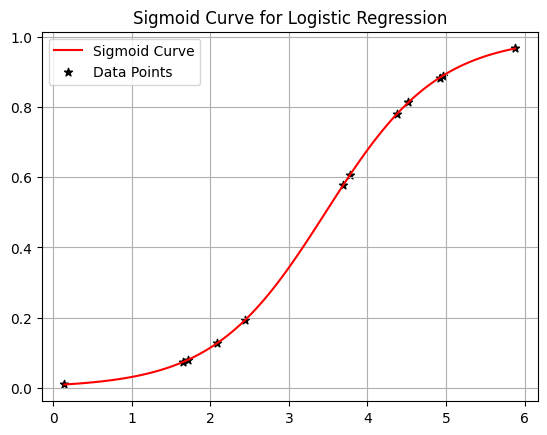

In [ ]:
#plot of sigmoid curve
x_range = np.linspace(np.min(x), np.max(x), 100).reshape(-1, 1)
log_odds = LR1.coef_*x_range + LR1.intercept_
odds = np.exp(log_odds)
proba=odds/(1 + odds)

plt.plot(x_range, proba, color='red', label='Sigmoid Curve')
plt.scatter(x,prob,color='Black',marker='*',label='Data Points')

plt.legend()
plt.grid()
plt.title('Sigmoid Curve for Logistic Regression')
plt.show()


## 1. Logistic Regression in Python: Type 2

In [ ]:
import pandas as pd
df = pd.read_csv('/content/abcde.csv')
df.head(10)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.results,train_size=0.8,random_state=10)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print(y_predicted)
print(y_test)
print(model.score(X_test,y_test))


[1 1 0 0 0 0]
7     1
5     1
18    0
21    0
11    0
1     0
Name: results, dtype: int64
1.0


# Logistic regression without sklearn:type 3


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

k = pd.read_excel('/content/logistic_dataset.xlsx', usecols='A')
l = pd.read_excel('/content/logistic_dataset.xlsx', usecols='B')
x = np.array(k).reshape((-1, 1))
y = np.array(l)

m = len(x)

def gradient(x, y, y_pred):
    dw = (-1/m) * np.sum(x * (y - y_pred))
    db = (-1/m) * np.sum(y - y_pred)
    return dw, db

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def train():
    Wo = 0
    W1 = 0
    alpha = 0.01
    error = 0.001
    prev_loss = 0.5

    while True:
        y_pred = sigmoid(Wo + W1 * x)
        dw, db = gradient(x, y, y_pred)
        W1 = W1 - alpha * dw
        Wo = Wo - alpha * db
        current_loss = loss(y, y_pred)

        if abs(prev_loss - current_loss) < error:
            break

        prev_loss = current_loss

    return Wo, W1

Wo, W1 = train()
y_pred = Wo + W1 * x
print(y_pred)
print(W1, Wo)



[[0.47526712]
 [0.40447823]
 [0.01008296]
 [0.32964425]
 [0.31548647]
 [0.976857  ]
 [0.86561731]
 [0.98494716]
 [0.89595541]
 [0.7280846 ]
 [1.17102083]]
0.20225398503876643 -0.018232602056680158
